In [1]:
# load libraries
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [75]:
# set degrees of freedom 
d1 = 35
d2 = 50

In [76]:
# create a distribution with predefined dfs
f = sts.f(dfn = d1, dfd = d2)

In [77]:
# take 1000 random samples from distribution
rvs = f.rvs(size = 1000, random_state = 241)

In [78]:
# create a theoretical cdf
x = np.linspace(0.5, 4, 100)
pdf = f.pdf(x)

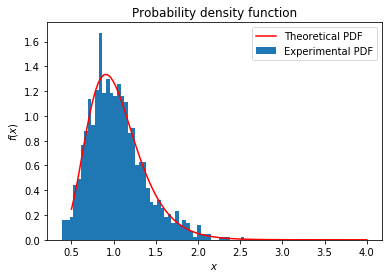

In [80]:
# plot theoretical and real cdf
plt.hist(rvs, bins = 50, density = True, label = 'Experimental PDF')
plt.plot(x, pdf, c = 'r', label = 'Theoretical PDF')
plt.title('Probability density function');
plt.xlabel('$x$');
plt.ylabel('$f(x)$');
plt.legend(); 

In [81]:
# calculate mean and dispersion of initial distribution
M = d2 / (d2 -2)
D = (2 * d2**2 *(d1 + d2 - 2)) / (d1 * (d2 - 2)**2 * (d2 - 4))

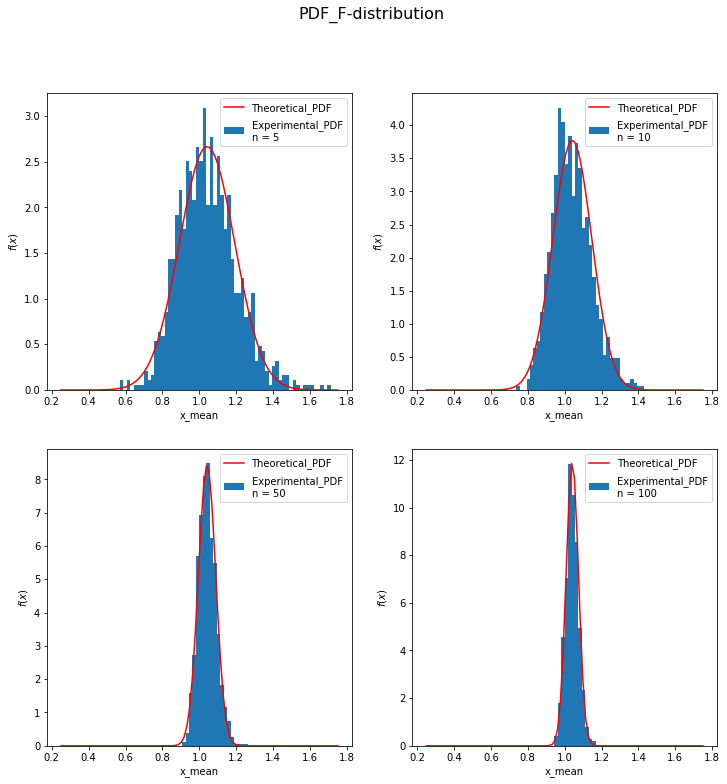

In [83]:
# make a sampling (1000 times with different sample size)
# plot histograms for means distribution
# for each distribution plot a theoretical pdf
n = [5, 10, 50, 100]     # create diff sample size
fig ,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))
ax = ax.ravel()
fig.suptitle('PDF_F-distribution', fontsize = 16)
x = np.linspace(0.25, 1.75, 100)
for j, k_size in enumerate(n):
    means = []
    i = 0
    while i < 1000:
        rvs = f.rvs(size = k_size)    # 
        means.append(rvs.mean())
        i += 1
    ax[j].hist(means, bins = 80, label = f'Experimental_PDF\nn = {k_size}', range = (0.25, 1.75), density = True)
    
    norm = sts.norm(loc = M, scale = np.sqrt(D / k_size))
    ax[j].plot(x, norm.pdf(x), c = 'r', label = 'Theoretical_PDF')  
    ax[j].legend()
    ax[j].set_xlabel('x_mean')
    ax[j].set_ylabel('$f(x)$')

Описание кода:
из распределения Фишера с параметрами (d1, d2 - степени свободы) сгенерирована выборка объемом 1000 и построена гистограмма. На этом же рисунке отображена функция плотности вероятности для теоретического распределения с этими же параметрами.

Целью второй части задачи являлась оценка распределения выборочного среднего при вырьировании числа образцов, извлекаемых из выборки. Показано, что с увеличением объема выборки возрастает точность аппроксимации распределения средних этих выборок нормальным распределением.